In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data

In [2]:
data = np.loadtxt('../data/concrete.txt')
np.random.shuffle(data)

cutoff = int(len(data)*0.8)
X_train, Y_train  = data[:cutoff, :-1], data[:cutoff, -1]
X_test, Y_test = data[cutoff:, :-1], data[cutoff:, -1]

std_X_train = np.std(X_train, axis=0)
mean_X_train = np.mean(X_train, axis=0)

X_train_norm = (X_train - std_X_train) / mean_X_train

In [3]:
model_params = {"learning_rate": 0.001,
                "dropout": 0.01,
                "hidden_width": 50,
               "batch_size": 32,
               "n_epoch": 40}

In [80]:
dtype = torch.FloatTensor

X_train_tensor = torch.Tensor(X_train_norm).type(dtype)
Y_train_tensor = torch.Tensor(Y_train).type(dtype)

tensor_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
data_loader = torch.utils.data.DataLoader(dataset=tensor_dataset, 
                                          batch_size=128, 
                                          shuffle=True)

In [81]:
batch_size, dim_in, hidden_width, dim_out = 32, 8, 50, 1

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
          torch.nn.Linear(dim_in, hidden_width),
          torch.nn.ReLU(),
          torch.nn.Linear(hidden_width, dim_out))

loss_function = torch.nn.MSELoss(size_average=False)
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [82]:
losses=[]
for epoch in range(40):
    for i, data in enumerate(data_loader):
        # Get each batch
        inputs, labels = data
        # Convert tensor into Variable
        tensor_inputs, tensor_labels = Variable(inputs), Variable(labels).float()
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward + backward + optimize
        outputs = model(tensor_inputs)
        loss = loss_function(outputs, tensor_labels)
        loss.backward()
        optimizer.step()    
        
    losses.append(loss.data[0])

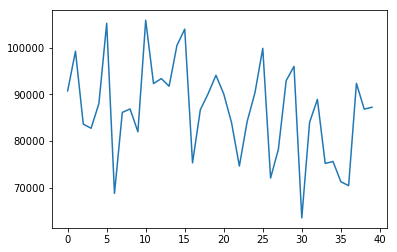

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)

In [76]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.dropout = nn.Dropout()
        self.fc1 = nn.Linear(8, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.dropout(x, training=True)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

torch.autograd.variable.Variable